In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

In [2]:
df_train=pd.read_csv('SalaryData_Train.csv')

In [3]:
df_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
df_train['Salary'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [6]:
df_train.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [7]:
df_train.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [8]:
df_train['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' Self-emp-inc', ' Without-pay'], dtype=object)

In [9]:
df_train['education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' 7th-8th', ' Doctorate',
       ' Assoc-voc', ' Prof-school', ' 5th-6th', ' 10th', ' Preschool',
       ' 12th', ' 1st-4th'], dtype=object)

In [10]:
df_train['maritalstatus'].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [11]:
df_train['occupation'].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Transport-moving',
       ' Farming-fishing', ' Machine-op-inspct', ' Tech-support',
       ' Craft-repair', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [12]:
df_train['relationship'].unique()

array([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [13]:
df_train['native'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' Mexico',
       ' Puerto-Rico', ' Honduras', ' England', ' Canada', ' Germany',
       ' Iran', ' Philippines', ' Poland', ' Columbia', ' Cambodia',
       ' Thailand', ' Ecuador', ' Laos', ' Taiwan', ' Haiti', ' Portugal',
       ' Dominican-Republic', ' El-Salvador', ' France', ' Guatemala',
       ' Italy', ' China', ' South', ' Japan', ' Yugoslavia', ' Peru',
       ' Outlying-US(Guam-USVI-etc)', ' Scotland', ' Trinadad&Tobago',
       ' Greece', ' Nicaragua', ' Vietnam', ' Hong', ' Ireland',
       ' Hungary'], dtype=object)

In [14]:
df_test=pd.read_csv('SalaryData_Test.csv')

In [15]:
df_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [16]:
df_test.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [17]:
print('df_train: ',df_train.columns)
print('df_test: ',df_test.columns)

df_train:  Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')
df_test:  Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')


In [18]:
print('df_train: ',df_train.shape)
print('df_test: ',df_test.shape)

df_train:  (30161, 14)
df_test:  (15060, 14)


In [19]:
df_train.head(10)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [20]:
df_train.drop(['educationno'],axis=1,inplace=True)

In [21]:
df_test.drop(['educationno'],axis=1,inplace=True)

In [22]:
df_train['hoursperweek'].unique()

array([40, 13, 16, 45, 50, 80, 30, 35, 60, 20, 52, 44, 15, 25, 43, 38, 55,
       48, 58, 32, 70, 22, 56, 41, 28, 36, 24, 46,  2, 42, 12, 65,  1, 34,
       75, 98, 33, 54, 10,  6, 64, 19, 18, 72,  8,  9, 47, 37, 21, 26, 14,
        5,  7, 99, 53, 39, 62, 59, 57, 78, 90, 66, 11, 49, 84, 17, 68,  3,
       27, 85, 31, 51, 77, 63, 23,  4, 87, 88, 73, 89, 97, 94, 29, 96, 67,
       82, 86, 91, 81, 76, 92, 61, 74, 95], dtype=int64)

In [23]:
df_train[df_train['hoursperweek']>=40]

,age,workclass,education,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30154,53,Private,Masters,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
30155,22,Private,Some-college,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
30157,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


C:\Users\sagar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='education', ylabel='count'>

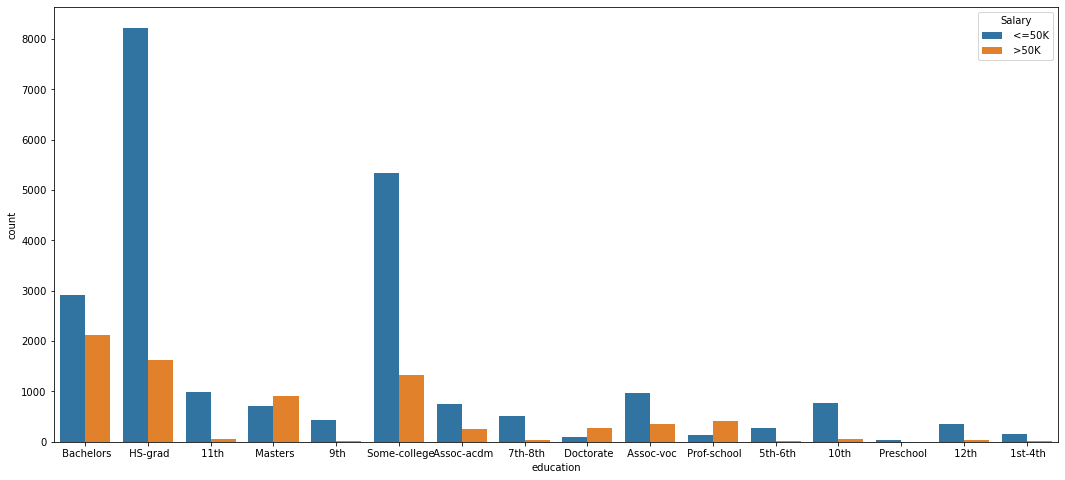

In [24]:
plt.figure(figsize=(18,8))
sns.countplot(df_train['education'],hue=df_train['Salary'])

C:\Users\sagar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='workclass', ylabel='count'>

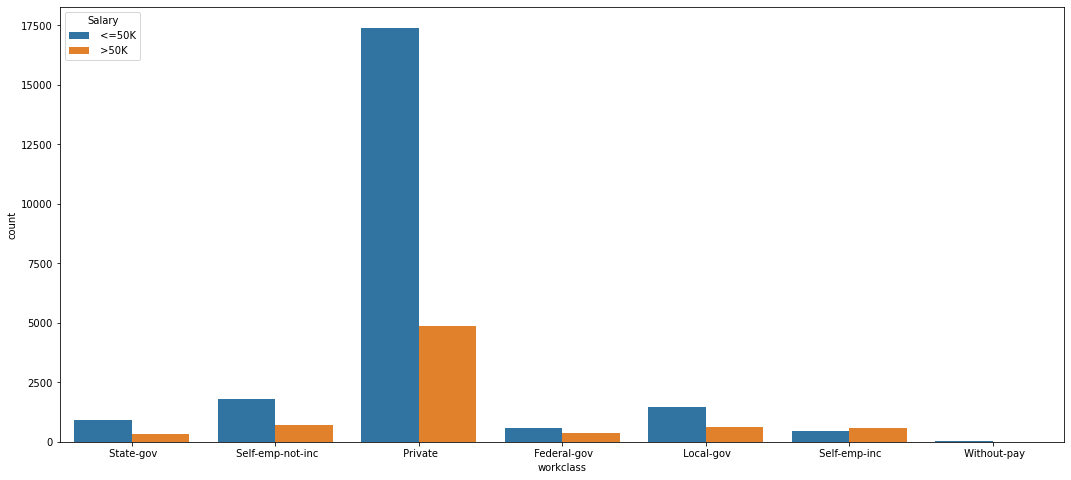

In [25]:
plt.figure(figsize=(18,8))
sns.countplot(df_train['workclass'],hue=df_train['Salary'])

C:\Users\sagar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, ' Adm-clerical'),
  Text(1, 0, ' Exec-managerial'),
  Text(2, 0, ' Handlers-cleaners'),
  Text(3, 0, ' Prof-specialty'),
  Text(4, 0, ' Other-service'),
  Text(5, 0, ' Sales'),
  Text(6, 0, ' Transport-moving'),
  Text(7, 0, ' Farming-fishing'),
  Text(8, 0, ' Machine-op-inspct'),
  Text(9, 0, ' Tech-support'),
  Text(10, 0, ' Craft-repair'),
  Text(11, 0, ' Protective-serv'),
  Text(12, 0, ' Armed-Forces'),
  Text(13, 0, ' Priv-house-serv')])

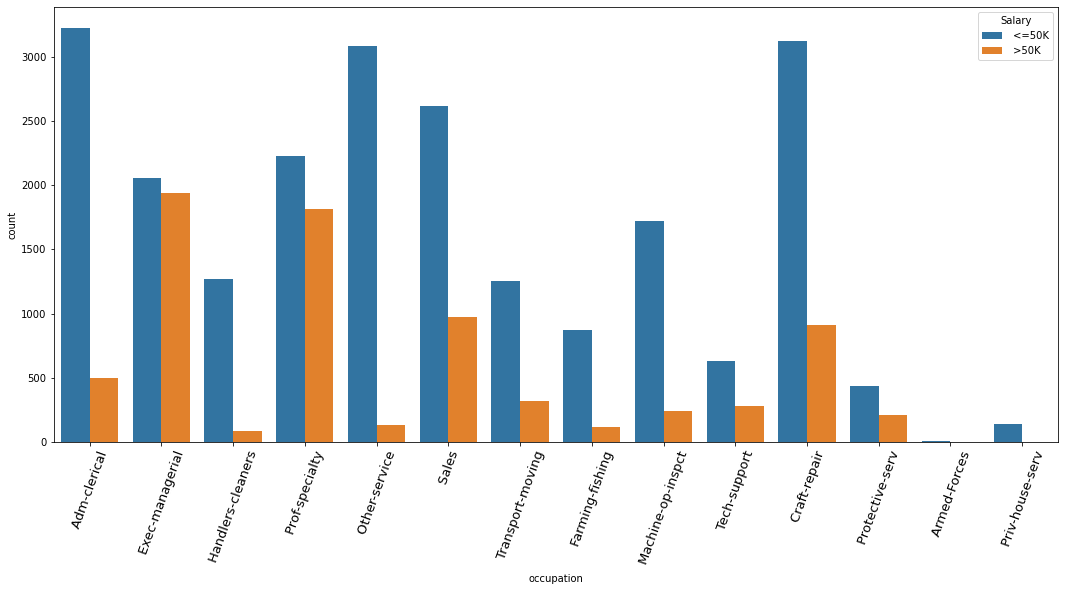

In [26]:
plt.figure(figsize=(18,8))
sns.countplot(df_train['occupation'],hue=df_train['Salary'])
plt.xticks(rotation=70,fontsize=13)

In [27]:
x=df_train[[ 'workclass', 'education', 'maritalstatus','occupation', 'relationship', 'race', 'sex','native']]
x_1=df_train[['workclass', 'education', 'maritalstatus','occupation', 'relationship', 'race', 'sex','native']]

In [28]:
from sklearn.preprocessing import LabelEncoder,MinMaxScaler

In [29]:
le=LabelEncoder()
for i in x:
    df_train[i]=le.fit_transform(df_train[i])

In [30]:
df_train

,age,workclass,education,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,4,0,1,4,1,2174,0,40,37,<=50K
1,50,4,9,2,3,0,4,1,0,0,13,37,<=50K
2,38,2,11,0,5,1,4,1,0,0,40,37,<=50K
3,53,2,1,2,5,0,2,1,0,0,40,37,<=50K
4,28,2,9,2,9,5,2,0,0,0,40,4,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,2,7,2,12,5,4,0,0,0,38,37,<=50K
30157,40,2,11,2,6,0,4,1,0,0,40,37,>50K
30158,58,2,11,6,0,4,4,0,0,0,40,37,<=50K
30159,22,2,11,4,0,3,4,1,0,0,20,37,<=50K


In [31]:
for i in x_1:
    df_test[i]=le.fit_transform(df_test[i])

In [32]:
df_test

,age,workclass,education,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,4,6,3,2,1,0,0,40,37,<=50K
1,38,2,11,2,4,0,4,1,0,0,50,37,<=50K
2,28,1,7,2,10,0,4,1,0,0,40,37,>50K
3,44,2,15,2,6,0,2,1,7688,0,40,37,>50K
4,34,2,0,4,7,1,4,1,0,0,30,37,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,4,9,3,4,1,0,0,40,37,<=50K
15056,39,2,9,0,9,1,4,0,0,0,36,37,<=50K
15057,38,2,9,2,9,0,4,1,0,0,50,37,<=50K
15058,44,2,9,0,0,3,1,1,5455,0,40,37,<=50K


In [33]:
df_train['Salary']=df_train['Salary'].map({' <=50K':1,' >50K':2})

In [34]:
df_test['Salary']=df_test['Salary'].map({' <=50K':1,' >50K':2})

In [35]:
df_train

,age,workclass,education,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,4,0,1,4,1,2174,0,40,37,1
1,50,4,9,2,3,0,4,1,0,0,13,37,1
2,38,2,11,0,5,1,4,1,0,0,40,37,1
3,53,2,1,2,5,0,2,1,0,0,40,37,1
4,28,2,9,2,9,5,2,0,0,0,40,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,2,7,2,12,5,4,0,0,0,38,37,1
30157,40,2,11,2,6,0,4,1,0,0,40,37,2
30158,58,2,11,6,0,4,4,0,0,0,40,37,1
30159,22,2,11,4,0,3,4,1,0,0,20,37,1


In [36]:
x_train=df_train.iloc[:,:12]
x_test=df_test.iloc[:,:12]
y_train=df_train.iloc[:,-1]
y_test=df_test.iloc[:,-1]

In [37]:
x_train

,age,workclass,education,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,39,5,9,4,0,1,4,1,2174,0,40,37
1,50,4,9,2,3,0,4,1,0,0,13,37
2,38,2,11,0,5,1,4,1,0,0,40,37
3,53,2,1,2,5,0,2,1,0,0,40,37
4,28,2,9,2,9,5,2,0,0,0,40,4
...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,2,7,2,12,5,4,0,0,0,38,37
30157,40,2,11,2,6,0,4,1,0,0,40,37
30158,58,2,11,6,0,4,4,0,0,0,40,37
30159,22,2,11,4,0,3,4,1,0,0,20,37


In [38]:
minmax=MinMaxScaler()
x_train=minmax.fit_transform(x_train)
x_train=pd.DataFrame(data=x_train,columns=['age','workclass','education','maritalstatus','occupation','relationship','race','sex','capitalgain','capitalloss','hoursperweek','native'])

In [39]:
x_train

,age,workclass,education,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,0.301370,0.833333,0.600000,0.666667,0.000000,0.2,1.0,1.0,0.021740,0.0,0.397959,0.948718
1,0.452055,0.666667,0.600000,0.333333,0.230769,0.0,1.0,1.0,0.000000,0.0,0.122449,0.948718
2,0.287671,0.333333,0.733333,0.000000,0.384615,0.2,1.0,1.0,0.000000,0.0,0.397959,0.948718
3,0.493151,0.333333,0.066667,0.333333,0.384615,0.0,0.5,1.0,0.000000,0.0,0.397959,0.948718
4,0.150685,0.333333,0.600000,0.333333,0.692308,1.0,0.5,0.0,0.000000,0.0,0.397959,0.102564
...,...,...,...,...,...,...,...,...,...,...,...,...
30156,0.136986,0.333333,0.466667,0.333333,0.923077,1.0,1.0,0.0,0.000000,0.0,0.377551,0.948718
30157,0.315068,0.333333,0.733333,0.333333,0.461538,0.0,1.0,1.0,0.000000,0.0,0.397959,0.948718
30158,0.561644,0.333333,0.733333,1.000000,0.000000,0.8,1.0,0.0,0.000000,0.0,0.397959,0.948718
30159,0.068493,0.333333,0.733333,0.666667,0.000000,0.6,1.0,1.0,0.000000,0.0,0.193878,0.948718


In [40]:
x_test=minmax.transform(x_test)
x_test=pd.DataFrame(data=x_test,columns=['age','workclass','education','maritalstatus','occupation','relationship','race','sex','capitalgain','capitalloss','hoursperweek','native'])

In [41]:
x_test

,age,workclass,education,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,0.109589,0.333333,0.066667,0.666667,0.461538,0.6,0.50,1.0,0.000000,0.0,0.397959,0.948718
1,0.287671,0.333333,0.733333,0.333333,0.307692,0.0,1.00,1.0,0.000000,0.0,0.500000,0.948718
2,0.150685,0.166667,0.466667,0.333333,0.769231,0.0,1.00,1.0,0.000000,0.0,0.397959,0.948718
3,0.369863,0.333333,1.000000,0.333333,0.461538,0.0,0.50,1.0,0.076881,0.0,0.397959,0.948718
4,0.232877,0.333333,0.000000,0.666667,0.538462,0.2,1.00,1.0,0.000000,0.0,0.295918,0.948718
...,...,...,...,...,...,...,...,...,...,...,...,...
15055,0.219178,0.333333,0.600000,0.666667,0.692308,0.6,1.00,1.0,0.000000,0.0,0.397959,0.948718
15056,0.301370,0.333333,0.600000,0.000000,0.692308,0.2,1.00,0.0,0.000000,0.0,0.357143,0.948718
15057,0.287671,0.333333,0.600000,0.333333,0.692308,0.0,1.00,1.0,0.000000,0.0,0.500000,0.948718
15058,0.369863,0.333333,0.600000,0.000000,0.000000,0.6,0.25,1.0,0.054551,0.0,0.397959,0.948718


In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Logistic Regression

In [43]:
logis=LogisticRegression(max_iter=300)
model=logis.fit(x_train,y_train)
y_pred=model.predict(x_test)
print('accuracy_score: ', accuracy_score(y_pred,y_test))
print('confusion_matrix: ', confusion_matrix(y_pred,y_test))
print('classification_report: ', classification_report(y_pred,y_test))

accuracy_score:  0.7942231075697211
confusion_matrix:  [[10827  2566]
 [  533  1134]]
classification_report:                precision    recall  f1-score   support

           1       0.95      0.81      0.87     13393
           2       0.31      0.68      0.42      1667

    accuracy                           0.79     15060
   macro avg       0.63      0.74      0.65     15060
weighted avg       0.88      0.79      0.82     15060



In [44]:
x_pred=model.predict(x_train)
print('accuracy_score: ', accuracy_score(x_pred,y_train))
print('confusion_matrix: ', confusion_matrix(x_pred,y_train))
print('classification_report: ', classification_report(x_pred,y_train))

accuracy_score:  0.7955638075660622
confusion_matrix:  [[21645  5158]
 [ 1008  2350]]
classification_report:                precision    recall  f1-score   support

           1       0.96      0.81      0.88     26803
           2       0.31      0.70      0.43      3358

    accuracy                           0.80     30161
   macro avg       0.63      0.75      0.65     30161
weighted avg       0.88      0.80      0.83     30161



# Decision Tree using gini

In [45]:
tree=DecisionTreeClassifier()
model_1=tree.fit(x_train,y_train)
y_pred=model_1.predict(x_test)
print('accuracy_score: ', accuracy_score(y_pred,y_test))
print('confusion_matrix: ', confusion_matrix(y_pred,y_test))
print('classification_report: ', classification_report(y_pred,y_test))

accuracy_score:  0.8102921646746348
confusion_matrix:  [[9974 1471]
 [1386 2229]]
classification_report:                precision    recall  f1-score   support

           1       0.88      0.87      0.87     11445
           2       0.60      0.62      0.61      3615

    accuracy                           0.81     15060
   macro avg       0.74      0.74      0.74     15060
weighted avg       0.81      0.81      0.81     15060



In [46]:
x_pred_1=model_1.predict(x_train)
print('accuracy_score: ', accuracy_score(x_pred_1,y_train))
print('confusion_matrix: ', confusion_matrix(x_pred_1,y_train))
print('classification_report: ', classification_report(x_pred_1,y_train))

accuracy_score:  0.9750339842843407
confusion_matrix:  [[22528   628]
 [  125  6880]]
classification_report:                precision    recall  f1-score   support

           1       0.99      0.97      0.98     23156
           2       0.92      0.98      0.95      7005

    accuracy                           0.98     30161
   macro avg       0.96      0.98      0.97     30161
weighted avg       0.98      0.98      0.98     30161



#  Decision Tree using Entropy

In [47]:
tree_1=DecisionTreeClassifier(criterion='entropy')
model_2=tree_1.fit(x_train,y_train)
y_pred=model_2.predict(x_test)
print('accuracy_score: ', accuracy_score(y_pred,y_test))
print('confusion_matrix: ', confusion_matrix(y_pred,y_test))
print('classification_report: ', classification_report(y_pred,y_test))

accuracy_score:  0.8122841965471448
confusion_matrix:  [[9985 1452]
 [1375 2248]]
classification_report:                precision    recall  f1-score   support

           1       0.88      0.87      0.88     11437
           2       0.61      0.62      0.61      3623

    accuracy                           0.81     15060
   macro avg       0.74      0.75      0.74     15060
weighted avg       0.81      0.81      0.81     15060



In [48]:
x_pred_2=model_2.predict(x_train)
print('accuracy_score: ', accuracy_score(x_pred_2,y_train))
print('confusion_matrix: ', confusion_matrix(x_pred_2,y_train))
print('classification_report: ', classification_report(x_pred_2,y_train))

accuracy_score:  0.9750339842843407
confusion_matrix:  [[22528   628]
 [  125  6880]]
classification_report:                precision    recall  f1-score   support

           1       0.99      0.97      0.98     23156
           2       0.92      0.98      0.95      7005

    accuracy                           0.98     30161
   macro avg       0.96      0.98      0.97     30161
weighted avg       0.98      0.98      0.98     30161



# Random Forest

In [49]:
random=RandomForestClassifier(n_estimators=150,max_features=10,random_state=0)
model_3=random.fit(x_train,y_train)
y_pred=model_3.predict(x_test)
print('accuracy_score: ', accuracy_score(y_pred,y_test))
print('confusion_matrix: ', confusion_matrix(y_pred,y_test))
print('classification_report: ', classification_report(y_pred,y_test))

accuracy_score:  0.8426958831341301
confusion_matrix:  [[10396  1405]
 [  964  2295]]
classification_report:                precision    recall  f1-score   support

           1       0.92      0.88      0.90     11801
           2       0.62      0.70      0.66      3259

    accuracy                           0.84     15060
   macro avg       0.77      0.79      0.78     15060
weighted avg       0.85      0.84      0.85     15060



In [56]:
x_pred=model_3.predict(x_train)
print('accuracy_score: ', accuracy_score(x_pred,y_train))

accuracy_score:  0.9750339842843407


# SVM

In [50]:
model_4=SVC(kernel='linear')
model_4.fit(x_train,y_train)
y_pred=model_4.predict(x_test)
print('accuracy_score:',accuracy_score(y_pred,y_test))
print('confusion_matrix: ', confusion_matrix(y_pred,y_test))
print('classification_report: ', classification_report(y_pred,y_test))

accuracy_score: 0.7935590969455512
confusion_matrix:  [[10891  2640]
 [  469  1060]]
classification_report:                precision    recall  f1-score   support

           1       0.96      0.80      0.88     13531
           2       0.29      0.69      0.41      1529

    accuracy                           0.79     15060
   macro avg       0.62      0.75      0.64     15060
weighted avg       0.89      0.79      0.83     15060



In [51]:
model_5=SVC(kernel='poly')
model_5.fit(x_train,y_train)
y_pred=model_5.predict(x_test)
print('accuracy_score:',accuracy_score(y_pred,y_test))
print('confusion_matrix: ', confusion_matrix(y_pred,y_test))
print('classification_report: ', classification_report(y_pred,y_test))

accuracy_score: 0.8110225763612218
confusion_matrix:  [[11029  2515]
 [  331  1185]]
classification_report:                precision    recall  f1-score   support

           1       0.97      0.81      0.89     13544
           2       0.32      0.78      0.45      1516

    accuracy                           0.81     15060
   macro avg       0.65      0.80      0.67     15060
weighted avg       0.91      0.81      0.84     15060



In [52]:
model_6=SVC(kernel='rbf')
model_6.fit(x_train,y_train)
y_pred=model_6.predict(x_test)
print('accuracy_score:',accuracy_score(y_pred,y_test))
print('confusion_matrix: ', confusion_matrix(y_pred,y_test))
print('classification_report: ', classification_report(y_pred,y_test))

accuracy_score: 0.8141434262948207
confusion_matrix:  [[11017  2456]
 [  343  1244]]
classification_report:                precision    recall  f1-score   support

           1       0.97      0.82      0.89     13473
           2       0.34      0.78      0.47      1587

    accuracy                           0.81     15060
   macro avg       0.65      0.80      0.68     15060
weighted avg       0.90      0.81      0.84     15060



# Naive_Bayes

In [55]:
model_7=GaussianNB()
model_7.fit(x_train,y_train)
y_pred=model_7.predict(x_test)
print('accuracy_score: ',accuracy_score(y_test,y_pred))
print('confusion_metrix: ',confusion_matrix(y_test,y_pred))
print('classification_report: ',classification_report(y_test,y_pred))

accuracy_score:  0.7924302788844622
confusion_metrix:  [[10797   563]
 [ 2563  1137]]
classification_report:                precision    recall  f1-score   support

           1       0.81      0.95      0.87     11360
           2       0.67      0.31      0.42      3700

    accuracy                           0.79     15060
   macro avg       0.74      0.63      0.65     15060
weighted avg       0.77      0.79      0.76     15060



# Conclusion
* Decision Tree is giving better result for this dataset as compare to other models